### Loading dataset

In [11]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
print("Wine dataset size:", X.shape)

Wine dataset size: (178, 13)


### Apply PCA to the Wine data

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### Making the scatterplot

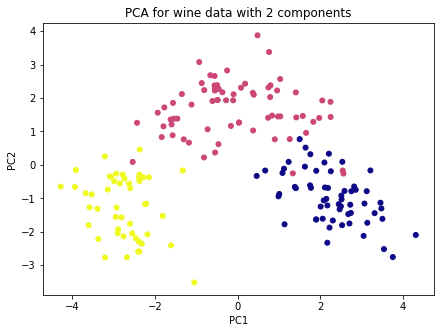

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=25, cmap='plasma')
plt.title('PCA for wine data with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("PCA.png")

- The data appears to be linearly separable with linear decision boundaries (i.e. straight lines). However, some data points would be misclassified. Classes have not been well separated since PCA doesn’t maximize class separability.
- When applying PCA to the Wine data by keeping only two components, we lost a significant amount of variance in the data

In [7]:
exp_var = sum(pca.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 55.40633835693531


### Apply LDA to the Wine data

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [9]:
### Making the scatterplot

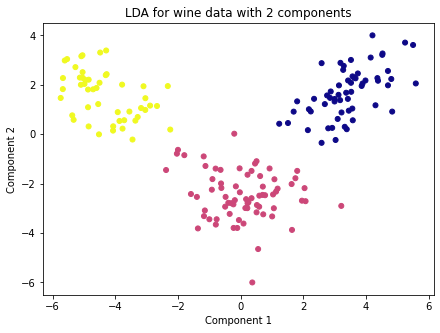

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, s=25, cmap='plasma')
plt.title('LDA for wine data with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig("LDA.png")

- Now, the classes have been clearly separated since LDA maximizes class separability in addition to reducing dimensionality. The data points will not be misclassified when drawing linear decision boundaries.
- The maximum number of components that LDA can keep for Wine data is also two because there are only three classes in the data. So, these two components should capture all the variance in the data.

In [13]:
exp_var = sum(lda.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 100.0
